In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, precision_recall_curve, auc, roc_curve, roc_auc_score
from sklearn.preprocessing import LabelEncoder

pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv('dataset/UnderstandingBusiness/UW_Understanding_Business_LOT.csv')

/var/folders/t7/8jpyd8kx5hb1sr_q4_6d6dt80000gn/T/ipykernel_50617/1723780546.py:1: DtypeWarning: Columns (4,10,11,12,13,14,16,23,24,25) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('dataset/UnderstandingBusiness/UW_Understanding_Business_LOT.csv')


In [3]:
df.shape

(1323762, 34)

In [4]:
df.head()

,source_type,TIMESTAMP,COOKIE_ID,VISIT_NUMBER,PAGE,PAGE_VIEWS,MARKETING_CHANNEL,PLATFORM_TYPE,OPERATING_SYSTEMS,MARKET_LANGUAGE,CUSTOMER_LOYALTY,DEPARTURE_DATE,ARRIVAL_DATE,ORIGIN_AND_DESTINATION_PORTS,RANGE,STAY_LENGTH,FLIGHT_TYPE,NUMBER_OF_SEGMENTS,DAYS_TO_DEPARTURE,ADULTS,TEENS,CHILDS,INFANTS,CLASS_TYPE,FARE_FAMILY,FLOW_TYPE,PAID_SEATS,ONBOARD_MEALS,EXTRA_BAGGAGE,BUSINESS_LOUNGE,SPECIAL_EQUIPMENT,FAST_TRACK,BOOKING_CONFIRMATION,BOOKING_CHANGE_CONFIRMATION
0,TRANSACTION,2023-08-15 18:10:18,90160409479417649411999102181002937619,563,NaN,NaN,SEO,Mobile App,ios 17.3.1,PL_PL,loyal,2023-09-13,2022-11-13,WAW-AMS,Short Haul,1.0,Round-Trip,2.0,28.0,1.0,0.0,0.0,0.0,Economy,Saver,Primary,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,TRANSACTION,2023-08-07 08:07:50,83506423751136985820103526870163297871,72,NaN,NaN,Direct,Mobile App,ios 18.0,PL_PL,return,2023-08-09,2022-11-09,GDN-RZE,Domestic,1.0,Round-Trip,4.0,1.0,1.0,0.0,0.0,0.0,Economy,Saver,Primary,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,TRANSACTION,2023-07-09 12:27:11,78236612428921115877508527232487027464,95,NaN,NaN,Direct,Mobile App,ios 17.6.1,PL_PL,loyal,2023-07-15,2022-11-20,PRG-WAW,Short Haul,7.0,Round-Trip,2.0,5.0,1.0,0.0,0.0,0.0,Economy,Standard,Primary,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,TRANSACTION,2023-07-20 07:15:18,86513654906858836814951255651058285578,296,NaN,NaN,Direct,Mobile App,ios 17.6.1,PL_PL,loyal,2023-07-25,2022-11-25,WRO-WAW,Domestic,2.0,Round-Trip,2.0,4.0,1.0,0.0,0.0,0.0,Economy,Saver,Primary,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,TRANSACTION,2023-08-22 05:27:37,07263717780177747617979091720349832062,127,NaN,NaN,Direct,Mobile App,ios 18.0,PL_PL,loyal,2023-08-29,NaN,CPH-RZE,Short Haul,NaN,One-Way,2.0,6.0,1.0,0.0,0.0,0.0,Economy,Saver,Primary,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [5]:
df['PAGE'] = df['PAGE'].fillna(0)
df['PAGE_VIEWS'] = df['PAGE_VIEWS'].fillna(0)
df['STAY_LENGTH'] = df['STAY_LENGTH'].fillna(0)
df['OPERATING_SYSTEMS'] = df['OPERATING_SYSTEMS'].apply(lambda x: x.split(' ')[0])

In [6]:
df.head()

,source_type,TIMESTAMP,COOKIE_ID,VISIT_NUMBER,PAGE,PAGE_VIEWS,MARKETING_CHANNEL,PLATFORM_TYPE,OPERATING_SYSTEMS,MARKET_LANGUAGE,CUSTOMER_LOYALTY,DEPARTURE_DATE,ARRIVAL_DATE,ORIGIN_AND_DESTINATION_PORTS,RANGE,STAY_LENGTH,FLIGHT_TYPE,NUMBER_OF_SEGMENTS,DAYS_TO_DEPARTURE,ADULTS,TEENS,CHILDS,INFANTS,CLASS_TYPE,FARE_FAMILY,FLOW_TYPE,PAID_SEATS,ONBOARD_MEALS,EXTRA_BAGGAGE,BUSINESS_LOUNGE,SPECIAL_EQUIPMENT,FAST_TRACK,BOOKING_CONFIRMATION,BOOKING_CHANGE_CONFIRMATION
0,TRANSACTION,2023-08-15 18:10:18,90160409479417649411999102181002937619,563,0,0.0,SEO,Mobile App,ios,PL_PL,loyal,2023-09-13,2022-11-13,WAW-AMS,Short Haul,1.0,Round-Trip,2.0,28.0,1.0,0.0,0.0,0.0,Economy,Saver,Primary,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,TRANSACTION,2023-08-07 08:07:50,83506423751136985820103526870163297871,72,0,0.0,Direct,Mobile App,ios,PL_PL,return,2023-08-09,2022-11-09,GDN-RZE,Domestic,1.0,Round-Trip,4.0,1.0,1.0,0.0,0.0,0.0,Economy,Saver,Primary,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,TRANSACTION,2023-07-09 12:27:11,78236612428921115877508527232487027464,95,0,0.0,Direct,Mobile App,ios,PL_PL,loyal,2023-07-15,2022-11-20,PRG-WAW,Short Haul,7.0,Round-Trip,2.0,5.0,1.0,0.0,0.0,0.0,Economy,Standard,Primary,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,TRANSACTION,2023-07-20 07:15:18,86513654906858836814951255651058285578,296,0,0.0,Direct,Mobile App,ios,PL_PL,loyal,2023-07-25,2022-11-25,WRO-WAW,Domestic,2.0,Round-Trip,2.0,4.0,1.0,0.0,0.0,0.0,Economy,Saver,Primary,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,TRANSACTION,2023-08-22 05:27:37,07263717780177747617979091720349832062,127,0,0.0,Direct,Mobile App,ios,PL_PL,loyal,2023-08-29,NaN,CPH-RZE,Short Haul,0.0,One-Way,2.0,6.0,1.0,0.0,0.0,0.0,Economy,Saver,Primary,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1323762 entries, 0 to 1323761
Data columns (total 34 columns):
 #   Column                        Non-Null Count    Dtype  
---  ------                        --------------    -----  
 0   source_type                   1323762 non-null  object 
 1   TIMESTAMP                     1182159 non-null  object 
 2   COOKIE_ID                     1323762 non-null  object 
 3   VISIT_NUMBER                  1323762 non-null  int64  
 4   PAGE                          1323762 non-null  object 
 5   PAGE_VIEWS                    1323762 non-null  float64
 6   MARKETING_CHANNEL             1323762 non-null  object 
 7   PLATFORM_TYPE                 1323762 non-null  object 
 8   OPERATING_SYSTEMS             1323762 non-null  object 
 9   MARKET_LANGUAGE               1323490 non-null  object 
 10  CUSTOMER_LOYALTY              35879 non-null    object 
 11  DEPARTURE_DATE                35590 non-null    object 
 12  ARRIVAL_DATE                

In [8]:
categorical_cols = [
    'source_type', 'MARKETING_CHANNEL', 'PLATFORM_TYPE', 'ORIGIN_AND_DESTINATION_PORTS',
    'OPERATING_SYSTEMS', 'CUSTOMER_LOYALTY', 'FLIGHT_TYPE',
    'CLASS_TYPE', 'FARE_FAMILY', 'RANGE', 'FLOW_TYPE'
]

numerical_cols = [
    'VISIT_NUMBER', 'PAGE', 'PAGE_VIEWS',
    'STAY_LENGTH', 'NUMBER_OF_SEGMENTS', 'DAYS_TO_DEPARTURE',
    'ADULTS', 'TEENS', 'CHILDS',
    'INFANTS', 'BOOKING_CONFIRMATION', 'BOOKING_CHANGE_CONFIRMATION'
]
# numerical_cols = ['DAYS_TO_DEPARTURE', 'NUMBER_OF_SEGMENTS']
# numerical_cols = [col for col in df.columns if col not in categorical_cols and df[col].dtype in ['int64', 'float64']]

exclude_cols = ['COOKIE_ID', 'TIMESTAMP', 'MARKET_LANGUAGE', 'DEPARTURE_DATE', 'ARRIVAL_DATE']

ancillaries = [
    'PAID_SEATS', 'ONBOARD_MEALS', 
    'EXTRA_BAGGAGE', 'BUSINESS_LOUNGE', 
    'SPECIAL_EQUIPMENT', 'FAST_TRACK'
]

In [9]:
numerical_cols = [col for col in df.columns if col not in categorical_cols+ancillaries and pd.api.types.is_numeric_dtype(df[col])]

In [10]:
numerical_cols

['VISIT_NUMBER',
 'PAGE_VIEWS',
 'STAY_LENGTH',
 'NUMBER_OF_SEGMENTS',
 'DAYS_TO_DEPARTURE',
 'ADULTS',
 'TEENS',
 'CHILDS',
 'INFANTS',
 'BOOKING_CONFIRMATION',
 'BOOKING_CHANGE_CONFIRMATION']

In [11]:
# df.loc[:, ~df.columns.isin(exclude_cols)] = df.loc[:, ~df.columns.isin(exclude_cols)].fillna(0)
df = df.loc[:, ~df.columns.isin(exclude_cols)]

In [12]:
df.source_type.unique()

array(['TRANSACTION', 'ACTIVITY'], dtype=object)

In [13]:
df.head(20).to_csv('Sample_UW_Understanding_Business_LOT_head.csv', index=False)

In [14]:
# Check basic statistics of the dataset
eda_summary = df.describe(include='all')
eda_summary.T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
source_type,1323762,2,ACTIVITY,1287883,NaN,NaN,NaN,NaN,NaN,NaN,NaN
VISIT_NUMBER,1323762.0,NaN,NaN,NaN,97.58109,187.40431,1.0,5.0,24.0,100.0,1794.0
PAGE,1323762,13081,www.lot.com/pl/pl/book/availability/departure,104049,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PAGE_VIEWS,1323762.0,NaN,NaN,NaN,0.977701,0.211543,0.0,1.0,1.0,1.0,25.0
MARKETING_CHANNEL,1323762,9,Direct,399506,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PLATFORM_TYPE,1323762,3,Regular Web,845914,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OPERATING_SYSTEMS,1323762,7,windows,651813,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CUSTOMER_LOYALTY,35879,3,loyal,17728,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ORIGIN_AND_DESTINATION_PORTS,35599,2625,WAW-LHR,640,NaN,NaN,NaN,NaN,NaN,NaN,NaN
RANGE,35591,3,Short Haul,25354,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
na_values = df.isna().sum()
na_values[na_values > 0].sort_values(ascending=False)

NUMBER_OF_SEGMENTS              1288173
DAYS_TO_DEPARTURE               1288172
RANGE                           1288171
FLIGHT_TYPE                     1288171
ORIGIN_AND_DESTINATION_PORTS    1288163
CUSTOMER_LOYALTY                1287883
PAID_SEATS                      1287883
BOOKING_CONFIRMATION            1287883
FAST_TRACK                      1287883
SPECIAL_EQUIPMENT               1287883
BUSINESS_LOUNGE                 1287883
EXTRA_BAGGAGE                   1287883
ONBOARD_MEALS                   1287883
CLASS_TYPE                      1287883
FLOW_TYPE                       1287883
FARE_FAMILY                     1287883
INFANTS                         1287883
CHILDS                          1287883
TEENS                           1287883
ADULTS                          1287883
BOOKING_CHANGE_CONFIRMATION     1287883
dtype: int64

In [16]:
# Check for missing values
missing_values = df.isnull().sum()
missing_values[missing_values > 0].sort_values(ascending=False)

NUMBER_OF_SEGMENTS              1288173
DAYS_TO_DEPARTURE               1288172
RANGE                           1288171
FLIGHT_TYPE                     1288171
ORIGIN_AND_DESTINATION_PORTS    1288163
CUSTOMER_LOYALTY                1287883
PAID_SEATS                      1287883
BOOKING_CONFIRMATION            1287883
FAST_TRACK                      1287883
SPECIAL_EQUIPMENT               1287883
BUSINESS_LOUNGE                 1287883
EXTRA_BAGGAGE                   1287883
ONBOARD_MEALS                   1287883
CLASS_TYPE                      1287883
FLOW_TYPE                       1287883
FARE_FAMILY                     1287883
INFANTS                         1287883
CHILDS                          1287883
TEENS                           1287883
ADULTS                          1287883
BOOKING_CHANGE_CONFIRMATION     1287883
dtype: int64

In [17]:
df.MARKETING_CHANNEL.unique()

array(['SEO', 'Direct', 'Social Media', 'SEM', 'Email', 'Remarketing',
       'Programmatic', 'Display', 'QR Code'], dtype=object)

In [18]:
for dtype in df.dtypes:
    if dtype == 'object':
        print(df.select_dtypes(include=[dtype]).nunique())

source_type                         2
PAGE                            13081
MARKETING_CHANNEL                   9
PLATFORM_TYPE                       3
OPERATING_SYSTEMS                   7
CUSTOMER_LOYALTY                    3
ORIGIN_AND_DESTINATION_PORTS     2625
RANGE                               3
FLIGHT_TYPE                         3
CLASS_TYPE                          3
FARE_FAMILY                         3
FLOW_TYPE                           2
dtype: int64
source_type                         2
PAGE                            13081
MARKETING_CHANNEL                   9
PLATFORM_TYPE                       3
OPERATING_SYSTEMS                   7
CUSTOMER_LOYALTY                    3
ORIGIN_AND_DESTINATION_PORTS     2625
RANGE                               3
FLIGHT_TYPE                         3
CLASS_TYPE                          3
FARE_FAMILY                         3
FLOW_TYPE                           2
dtype: int64
source_type                         2
PAGE                    

In [19]:
# Check for class imbalance in the target columns
ancillary_class_distribution = df[ancillaries].mean()
ancillary_class_distribution.sort_values(ascending=False)

PAID_SEATS           28.478985
EXTRA_BAGGAGE        13.158268
SPECIAL_EQUIPMENT     0.816341
FAST_TRACK            0.626396
ONBOARD_MEALS         0.581447
BUSINESS_LOUNGE       0.229430
dtype: float64

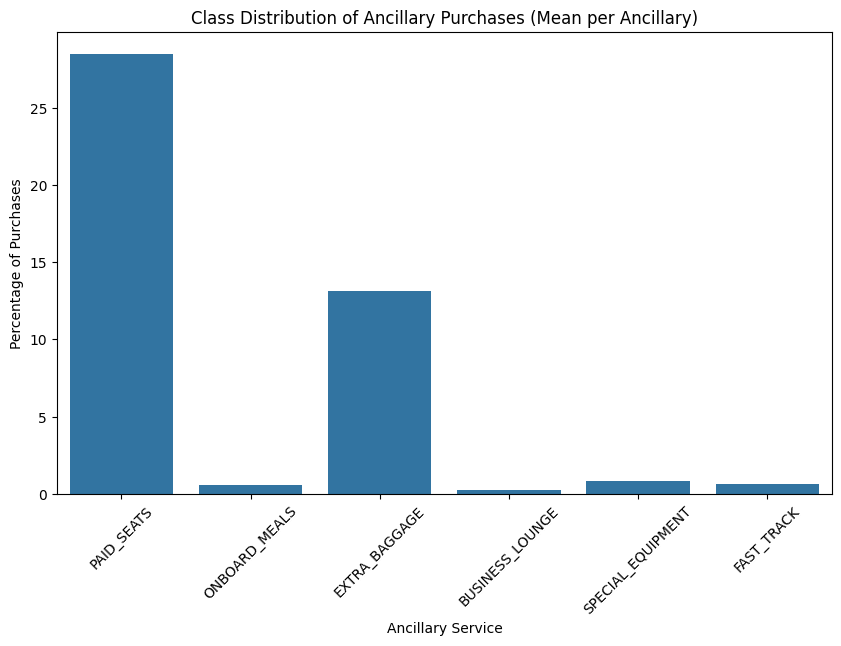

In [20]:
# Visualize the class distribution of target variables
plt.figure(figsize=(10, 6))
sns.barplot(x=ancillary_class_distribution.index, y=ancillary_class_distribution.values)
plt.title('Class Distribution of Ancillary Purchases (Mean per Ancillary)')
plt.ylabel('Percentage of Purchases')
plt.xlabel('Ancillary Service')
plt.xticks(rotation=45)
plt.show()

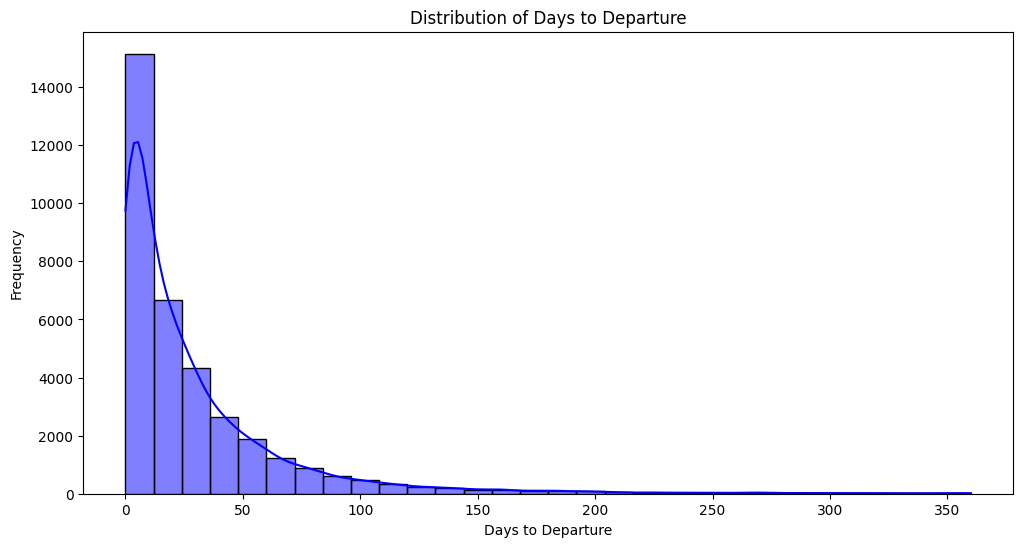

In [21]:
# Visualize the distribution of some important features
plt.figure(figsize=(12, 6))
sns.histplot(df['DAYS_TO_DEPARTURE'], kde=True, color='blue', bins=30)
plt.title('Distribution of Days to Departure')
plt.xlabel('Days to Departure')
plt.ylabel('Frequency')
plt.show()


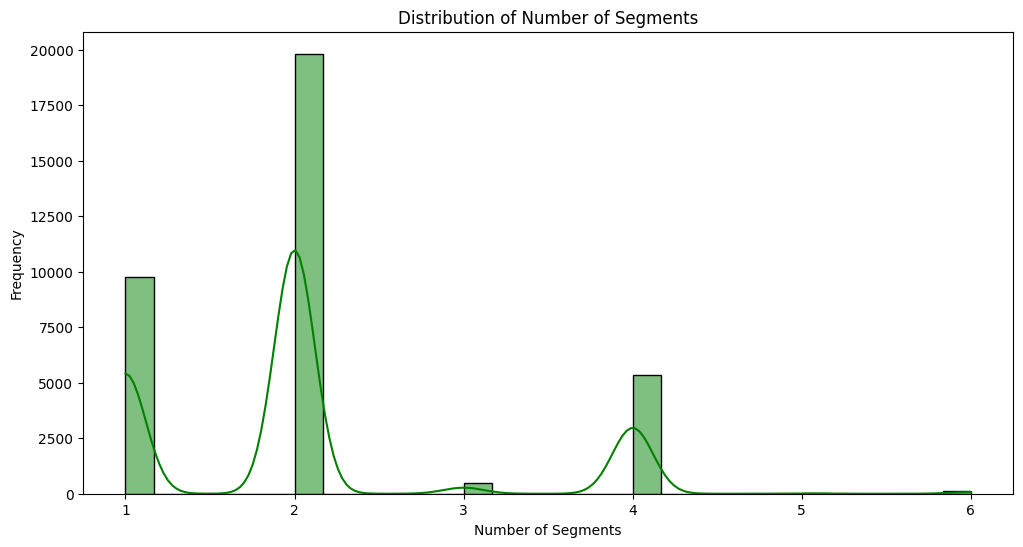

In [22]:
plt.figure(figsize=(12, 6))
sns.histplot(df['NUMBER_OF_SEGMENTS'], kde=True, color='green', bins=30)
plt.title('Distribution of Number of Segments')
plt.xlabel('Number of Segments')
plt.ylabel('Frequency')
plt.show()

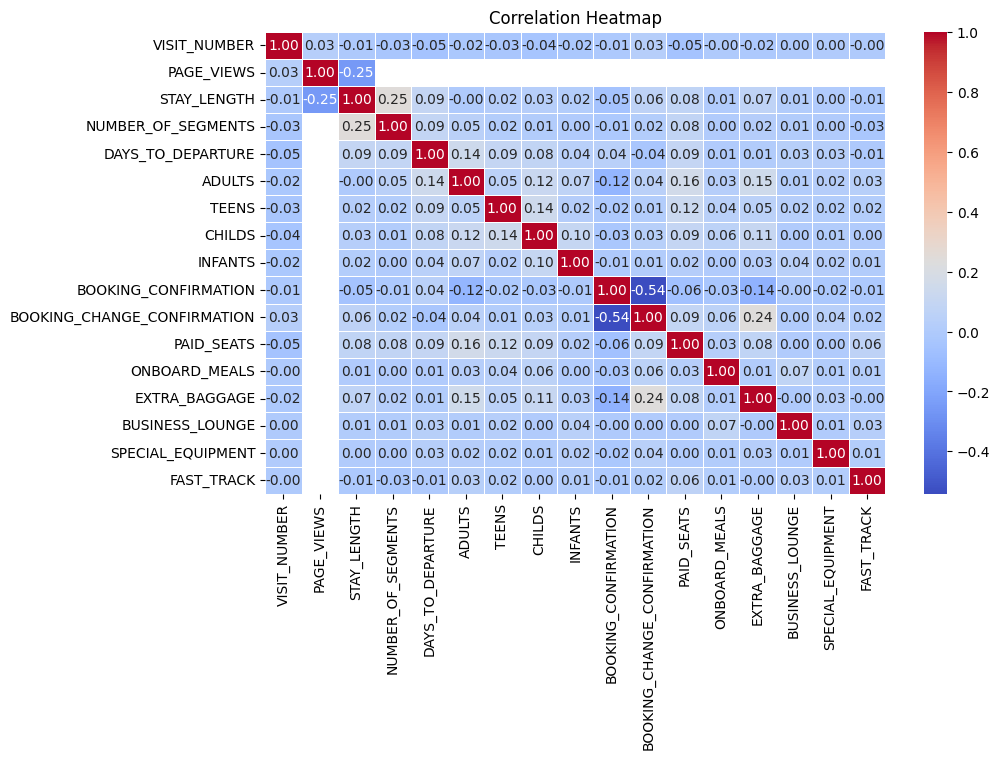

In [23]:
# Visualizing correlations with heatmap
corr = df[numerical_cols + ancillaries].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

## Handling Missing Values

In [25]:
for col in categorical_cols:
    mode_value = df[col].mode()[0]
    df[col] = df[col].fillna(mode_value)

In [26]:
df.STAY_LENGTH.unique()

array([  1.,   7.,   2.,   0.,   3.,   5.,   8.,   4.,   6.,  22.,  11.,
        17.,   9.,  14.,  13.,  10.,  18.,  47.,  15.,  23.,  21.,  16.,
        39.,  27.,  12.,  31.,  28.,  25.,  80.,  48., 100.,  19.,  70.,
        30.,  29.,  35.,  26.,  37.,  24., 111.,  34.,  33.,  53., 147.,
        66.,  32.,  20.,  36., 163.,  42.,  99.,  38.,  62.,  41.,  88.,
       139., 141., 193.,  67.,  71., 128.,  60.,  52.,  78.,  40.,  84.,
       103.,  69.,  68.,  49., 126.,  54.,  45., 151.,  56.,  59.,  87.,
        81.,  76.,  73.,  44., 106., 108.,  63., 175., 129.,  77., 179.,
        95., 143., 114., 104., 154.,  72., 277., 201.,  50.,  86.,  93.,
        55., 173., 156.,  43., 259., 113., 166., 284.,  90.,  91.,  83.,
        57.,  79.,  96., 314., 135., 218.,  65.,  89., 162., 188., 186.,
       301., 280.,  46., 119.,  98.,  51.,  58., 167.,  82., 142.,  74.,
       248., 171., 190.,  64., 117.,  61., 182., 204., 101., 109., 196.,
       136.,  85., 181., 124.,  92., 105., 249., 11

In [27]:
for col in numerical_cols:
    median_value = df[col].median()
    df[col] = df[col].fillna(median_value)

In [28]:
cleaned_df = df.dropna(subset=ancillaries)

In [29]:
cleaned_df.shape

(35879, 29)

In [30]:
cleaned_df.head()

,source_type,VISIT_NUMBER,PAGE,PAGE_VIEWS,MARKETING_CHANNEL,PLATFORM_TYPE,OPERATING_SYSTEMS,CUSTOMER_LOYALTY,ORIGIN_AND_DESTINATION_PORTS,RANGE,STAY_LENGTH,FLIGHT_TYPE,NUMBER_OF_SEGMENTS,DAYS_TO_DEPARTURE,ADULTS,TEENS,CHILDS,INFANTS,CLASS_TYPE,FARE_FAMILY,FLOW_TYPE,PAID_SEATS,ONBOARD_MEALS,EXTRA_BAGGAGE,BUSINESS_LOUNGE,SPECIAL_EQUIPMENT,FAST_TRACK,BOOKING_CONFIRMATION,BOOKING_CHANGE_CONFIRMATION
0,TRANSACTION,563,0,0.0,SEO,Mobile App,ios,loyal,WAW-AMS,Short Haul,1.0,Round-Trip,2.0,28.0,1.0,0.0,0.0,0.0,Economy,Saver,Primary,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,TRANSACTION,72,0,0.0,Direct,Mobile App,ios,return,GDN-RZE,Domestic,1.0,Round-Trip,4.0,1.0,1.0,0.0,0.0,0.0,Economy,Saver,Primary,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,TRANSACTION,95,0,0.0,Direct,Mobile App,ios,loyal,PRG-WAW,Short Haul,7.0,Round-Trip,2.0,5.0,1.0,0.0,0.0,0.0,Economy,Standard,Primary,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,TRANSACTION,296,0,0.0,Direct,Mobile App,ios,loyal,WRO-WAW,Domestic,2.0,Round-Trip,2.0,4.0,1.0,0.0,0.0,0.0,Economy,Saver,Primary,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,TRANSACTION,127,0,0.0,Direct,Mobile App,ios,loyal,CPH-RZE,Short Haul,0.0,One-Way,2.0,6.0,1.0,0.0,0.0,0.0,Economy,Saver,Primary,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


## Label encode categorical columns

In [31]:
label_encoders = {col: LabelEncoder() for col in categorical_cols}
for col, le in label_encoders.items():
    cleaned_df[col] = le.fit_transform(cleaned_df[col])

/var/folders/t7/8jpyd8kx5hb1sr_q4_6d6dt80000gn/T/ipykernel_50617/315653069.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df[col] = le.fit_transform(cleaned_df[col])
/var/folders/t7/8jpyd8kx5hb1sr_q4_6d6dt80000gn/T/ipykernel_50617/315653069.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df[col] = le.fit_transform(cleaned_df[col])
/var/folders/t7/8jpyd8kx5hb1sr_q4_6d6dt80000gn/T/ipykernel_50617/315653069.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice

In [32]:
cleaned_df.head()

,source_type,VISIT_NUMBER,PAGE,PAGE_VIEWS,MARKETING_CHANNEL,PLATFORM_TYPE,OPERATING_SYSTEMS,CUSTOMER_LOYALTY,ORIGIN_AND_DESTINATION_PORTS,RANGE,STAY_LENGTH,FLIGHT_TYPE,NUMBER_OF_SEGMENTS,DAYS_TO_DEPARTURE,ADULTS,TEENS,CHILDS,INFANTS,CLASS_TYPE,FARE_FAMILY,FLOW_TYPE,PAID_SEATS,ONBOARD_MEALS,EXTRA_BAGGAGE,BUSINESS_LOUNGE,SPECIAL_EQUIPMENT,FAST_TRACK,BOOKING_CONFIRMATION,BOOKING_CHANGE_CONFIRMATION
0,0,563,0,0.0,6,0,2,0,2327,2,1.0,2,2.0,28.0,1.0,0.0,0.0,0.0,1,1,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0,72,0,0.0,0,0,2,2,689,0,1.0,2,4.0,1.0,1.0,0.0,0.0,0.0,1,1,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0,95,0,0.0,0,0,2,0,1660,2,7.0,2,2.0,5.0,1.0,0.0,0.0,0.0,1,2,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0,296,0,0.0,0,0,2,0,2520,0,2.0,2,2.0,4.0,1.0,0.0,0.0,0.0,1,1,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0,127,0,0.0,0,0,2,0,459,2,0.0,1,2.0,6.0,1.0,0.0,0.0,0.0,1,1,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [33]:
scaler = StandardScaler()
cleaned_df[numerical_cols] = scaler.fit_transform(cleaned_df[numerical_cols])

/var/folders/t7/8jpyd8kx5hb1sr_q4_6d6dt80000gn/T/ipykernel_50617/2931327204.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df[numerical_cols] = scaler.fit_transform(cleaned_df[numerical_cols])


In [34]:
# Prepare features (X) and targets (y)
X = cleaned_df[categorical_cols + numerical_cols]
y = cleaned_df[ancillaries]

In [35]:
X.head()

,source_type,MARKETING_CHANNEL,PLATFORM_TYPE,ORIGIN_AND_DESTINATION_PORTS,OPERATING_SYSTEMS,CUSTOMER_LOYALTY,FLIGHT_TYPE,CLASS_TYPE,FARE_FAMILY,RANGE,FLOW_TYPE,VISIT_NUMBER,PAGE_VIEWS,STAY_LENGTH,NUMBER_OF_SEGMENTS,DAYS_TO_DEPARTURE,ADULTS,TEENS,CHILDS,INFANTS,BOOKING_CONFIRMATION,BOOKING_CHANGE_CONFIRMATION
0,0,6,0,2327,2,0,2,1,1,2,1,3.204545,0.0,-0.292775,-0.057840,-0.036159,-0.370643,-0.140921,-0.17033,-0.093167,0.071693,-0.225912
1,0,0,0,689,2,2,2,1,1,0,1,0.010855,0.0,-0.292775,1.999904,-0.690291,-0.370643,-0.140921,-0.17033,-0.093167,0.071693,-0.225912
2,0,0,0,1660,2,0,2,1,2,2,1,0.160457,0.0,0.065033,-0.057840,-0.593383,-0.370643,-0.140921,-0.17033,-0.093167,0.071693,-0.225912
3,0,0,0,2520,2,0,2,1,1,0,1,1.467854,0.0,-0.233140,-0.057840,-0.617610,-0.370643,-0.140921,-0.17033,-0.093167,0.071693,-0.225912
4,0,0,0,459,2,0,1,1,1,2,1,0.368600,0.0,-0.352409,-0.057840,-0.569156,-0.370643,-0.140921,-0.17033,-0.093167,0.071693,-0.225912


In [36]:
selected_features = ['MARKETING_CHANNEL', 'VISIT_NUMBER', 'STAY_LENGTH', 'ORIGIN_AND_DESTINATION_PORTS', 'DAYS_TO_DEPARTURE', 'RANGE', 'FARE_FAMILY', 'OPERATING_SYSTEMS']

In [37]:
X = X[selected_features]

In [38]:
X.head()

,MARKETING_CHANNEL,VISIT_NUMBER,STAY_LENGTH,ORIGIN_AND_DESTINATION_PORTS,DAYS_TO_DEPARTURE,RANGE,FARE_FAMILY,OPERATING_SYSTEMS
0,6,3.204545,-0.292775,2327,-0.036159,2,1,2
1,0,0.010855,-0.292775,689,-0.690291,0,1,2
2,0,0.160457,0.065033,1660,-0.593383,2,2,2
3,0,1.467854,-0.233140,2520,-0.617610,0,1,2
4,0,0.368600,-0.352409,459,-0.569156,2,1,2


In [39]:
y.head()

,PAID_SEATS,ONBOARD_MEALS,EXTRA_BAGGAGE,BUSINESS_LOUNGE,SPECIAL_EQUIPMENT,FAST_TRACK
0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0


## Split into Train, Validation, and Test sets

In [40]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [41]:
# Convert the target variables to binary (0 or 1)
y_train_binary = y_train.applymap(lambda x: 1 if x > 0 else 0).to_numpy()
y_val_binary = y_val.applymap(lambda x: 1 if x > 0 else 0).to_numpy()
y_test_binary = y_test.applymap(lambda x: 1 if x > 0 else 0).to_numpy()

/var/folders/t7/8jpyd8kx5hb1sr_q4_6d6dt80000gn/T/ipykernel_50617/1705487852.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  y_train_binary = y_train.applymap(lambda x: 1 if x > 0 else 0).to_numpy()
/var/folders/t7/8jpyd8kx5hb1sr_q4_6d6dt80000gn/T/ipykernel_50617/1705487852.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  y_val_binary = y_val.applymap(lambda x: 1 if x > 0 else 0).to_numpy()
/var/folders/t7/8jpyd8kx5hb1sr_q4_6d6dt80000gn/T/ipykernel_50617/1705487852.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  y_test_binary = y_test.applymap(lambda x: 1 if x > 0 else 0).to_numpy()


In [42]:
# selected_features_list = selected_features.Feature.tolist()
# selected_features_list

In [43]:
# list(set(features) - set(selected_features_list))

In [44]:
scaler = StandardScaler()
scaler.fit_transform(X_train[selected_features])

array([[-1.54401282, -0.2500534 , -0.35703543, ...,  0.59152233,
        -0.56544252, -1.23524472],
       [ 1.04913162, -0.32205756,  0.36506678, ..., -0.72890104,
         1.266247  ,  0.69745241],
       [ 1.04913162, -0.16495758, -0.35703543, ...,  0.59152233,
         1.266247  ,  0.21427813],
       ...,
       [-1.54401282,  1.32749218, -0.35703543, ...,  0.59152233,
         1.266247  , -1.23524472],
       [-1.54401282, -0.4529742 ,  0.06419086, ...,  0.59152233,
        -0.56544252,  0.21427813],
       [ 0.61694088, -0.4529742 , -0.1163347 , ...,  0.59152233,
         1.266247  ,  0.69745241]], shape=(25115, 8))

In [45]:
X_train[selected_features] = scaler.transform(X_train[selected_features])

In [46]:
X_train.head()

,MARKETING_CHANNEL,VISIT_NUMBER,STAY_LENGTH,ORIGIN_AND_DESTINATION_PORTS,DAYS_TO_DEPARTURE,RANGE,FARE_FAMILY,OPERATING_SYSTEMS
23500,-1.544013,-0.250053,-0.357035,0.829170,-0.685095,0.591522,-0.565443,-1.235245
23209,1.049132,-0.322058,0.365067,-0.897311,1.370900,-0.728901,1.266247,0.697452
32800,1.049132,-0.164958,-0.357035,-2.048299,0.185679,0.591522,1.266247,0.214278
14111,-0.679631,-0.439883,0.124366,-1.081167,4.249294,0.591522,-0.565443,-2.201593
24009,-0.247441,0.149242,-0.357035,-1.219689,0.717819,-2.049324,-0.565443,0.697452


In [47]:
y_train

,PAID_SEATS,ONBOARD_MEALS,EXTRA_BAGGAGE,BUSINESS_LOUNGE,SPECIAL_EQUIPMENT,FAST_TRACK
23500,0.000000,0.0,0.000000,0.0,0.000000,0.0
23209,0.000000,0.0,0.000000,0.0,0.000000,0.0
32800,0.000000,0.0,0.000000,0.0,0.000000,0.0
14111,0.000000,0.0,214.338462,0.0,0.000000,0.0
24009,0.000000,0.0,0.000000,0.0,0.000000,0.0
...,...,...,...,...,...,...
16850,0.000000,0.0,0.000000,0.0,0.000000,0.0
6265,78.545455,0.0,0.000000,0.0,0.000000,0.0
11284,0.000000,0.0,0.000000,0.0,0.000000,0.0
860,0.000000,0.0,0.000000,0.0,1111.111111,0.0


In [48]:
X_test[selected_features] = scaler.transform(X_test[selected_features])

In [49]:
X_test.head()

,MARKETING_CHANNEL,VISIT_NUMBER,STAY_LENGTH,ORIGIN_AND_DESTINATION_PORTS,DAYS_TO_DEPARTURE,RANGE,FARE_FAMILY,OPERATING_SYSTEMS
22226,1.481322,0.175426,-0.357035,0.841763,-0.249708,0.591522,-0.565443,0.697452
10823,-1.544013,-0.040587,-0.176510,0.845541,0.475938,0.591522,-0.565443,0.697452
33817,0.184750,-0.452974,-0.176510,-1.999187,-0.273896,0.591522,1.266247,0.697452
4817,0.616941,-0.380970,-0.357035,1.067176,0.693631,-2.049324,-0.565443,0.697452
9403,0.616941,-0.420245,-0.357035,0.894653,-0.612531,0.591522,-0.565443,-2.201593


In [50]:
X_val[selected_features] = scaler.transform(X_val[selected_features])

In [51]:
X_val.head()

,MARKETING_CHANNEL,VISIT_NUMBER,STAY_LENGTH,ORIGIN_AND_DESTINATION_PORTS,DAYS_TO_DEPARTURE,RANGE,FARE_FAMILY,OPERATING_SYSTEMS
14558,0.184750,0.561630,-0.357035,0.335530,-0.443213,0.591522,-2.397132,0.697452
27741,-1.544013,-0.400608,0.184541,0.839245,4.466987,0.591522,1.266247,0.697452
14112,0.616941,-0.452974,0.124366,0.905987,1.032266,-0.728901,-0.565443,-1.235245
26850,0.184750,-0.282783,-0.357035,-1.518140,-0.346461,0.591522,-0.565443,0.697452
28326,0.184750,-0.420245,-0.176510,-1.594956,-0.612531,0.591522,-0.565443,0.697452


## Build LightGBM base regressor + multi-output wrapper

In [52]:
from sklearn.multioutput import MultiOutputClassifier
from scipy.stats import randint as sp_randint, uniform
from sklearn.model_selection import RandomizedSearchCV
import lightgbm as lgb

base_lgbm_clf = lgb.LGBMClassifier(
    objective='binary',
    learning_rate=0.065,
    n_estimators=500,
    num_leaves=22,
    random_state=42,
    n_jobs=-1,
    # class_weight='balanced',
    # metric='binary_logloss',
)
lgbm_model = MultiOutputClassifier(base_lgbm_clf)

base_clf = lgb.LGBMClassifier(
    objective='binary'
)
model = MultiOutputClassifier(base_clf)

In [53]:
lgbm_model.fit(X_train, y_train_binary)

[LightGBM] [Info] Number of positive: 3735, number of negative: 21380
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000215 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 920
[LightGBM] [Info] Number of data points in the train set: 25115, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.148716 -> initscore=-1.744708
[LightGBM] [Info] Start training from score -1.744708
[LightGBM] [Info] Number of positive: 226, number of negative: 24889
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000249 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 920
[LightGBM] [Info] Number of data points in the train set: 25115, number of used features: 8
[LightGBM] [Info] [binary

MultiOutputClassifier(estimator=LGBMClassifier(learning_rate=0.065,
                                               n_estimators=500, n_jobs=-1,
                                               num_leaves=22,
                                               objective='binary',
                                               random_state=42))

In [54]:
param_dist = {
    'estimator__eval_set': [(X_val, y_val_binary)],
    'estimator__eval_metric': 'auc',
    # 'estimator__early_stopping_rounds': 10,
    'estimator__num_leaves': sp_randint(20, 100),
    'estimator__max_depth': sp_randint(3, 12),
    'estimator__learning_rate': uniform(0.01, 0.3),
    'estimator__n_estimators': sp_randint(50, 500),
    'estimator__subsample': uniform(0.6, 0.4),
    'estimator__colsample_bytree': uniform(0.6, 0.4),
}

# random_search = RandomizedSearchCV(
#     estimator=model,
#     param_distributions=param_dist,
#     n_iter=20,
#     scoring='roc_auc',
#     cv=3,
#     verbose=2,
#     n_jobs=-1,
#     random_state=42
# )
# random_search.fit(X_train, y_train_binary)

# print("Best parameters:", random_search.best_params_)
# print("Best CV ROC-AUC:", random_search.best_score_)

In [55]:
# import joblib

# # Save the fitted RandomizedSearchCV to a file
# joblib.dump(random_search, 'lgbm_random_search_model.pkl')
# print("Model saved to lgbm_random_search_model.pkl")

# random_search = joblib.load('lgbm_random_search_model.pkl')

In [56]:
best_model = random_search.best_estimator_
best_model

NameError: name 'random_search' is not defined

In [ ]:
model = lgbm_model
# model = best_model

In [ ]:
val_probas = np.column_stack([
    est.predict_proba(X_val)[:, 1]
    for est in model.estimators_
])

In [ ]:
val_probas[0:1]

array([[7.72409633e-03, 1.63882406e-04, 1.52587905e-03, 1.66260538e-13,
        1.79802533e-08, 2.39212702e-04]])

In [ ]:
# threshold = 0.65
def compute_threshold(ancillaries, y_val, val_probas):
    best_thresholds = {}
    best_f1s = {}

    for i, label in enumerate(ancillaries):
        # y_true = y_val[label].values
        y_true = (y_val[label].values > 0).astype(int)
        probs   = val_probas[:, i]
        
        # Compute precision/recall for all possible cutoffs
        precision, recall, thresholds = precision_recall_curve(y_true, probs)
        
        # Compute F1 for each point (precision & recall arrays are one element longer than thresholds)
        f1_scores = 2 * precision * recall / (precision + recall + 1e-8)
        
        # We ignore the last entry in f1_scores (it corresponds to zero thresholds)
        idx = np.argmax(f1_scores[:-1])
        
        best_thresholds[label] = thresholds[idx]
        best_f1s[label]        = f1_scores[idx]

    avg_threshold = np.mean(list(best_thresholds.values()))
    # Assemble into a DataFrame for easy viewing
    threshold_df = pd.DataFrame({
        'threshold': pd.Series(best_thresholds),
        'f1_score':  pd.Series(best_f1s)
    }).sort_values('threshold')

    print("Optimal threshold and F1 per service:")
    threshold_df = threshold_df.reset_index().rename(columns={'index': 'ancillary'})
    return avg_threshold, threshold_df

avg_threshold, threshold_df = compute_threshold(ancillaries, y_val, val_probas)

Optimal threshold and F1 per service:


In [ ]:
threshold_df.loc[
    threshold_df['ancillary'] == 'PAID_SEATS'
].threshold.values[0]

np.float64(0.2039554716518039)

In [ ]:
val_predicted = (val_probas > avg_threshold).astype(int)

In [ ]:
val_predicted

array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       ...,
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]], shape=(5382, 6))

In [ ]:
y_val_binary

array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       ...,
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]], shape=(5382, 6))

In [ ]:
for i, ancillary in enumerate(ancillaries):
    ytrue = y_val_binary[:, i]
    yprob = val_probas[:, i]
    # ypred = val_predicted[:, i]
    service_threshold = threshold_df.loc[
        threshold_df['ancillary'] == ancillary
    ].threshold.values[0]
    val_predicted = (val_probas > service_threshold).astype(int)
    ypred = val_predicted[:, i]

    precision = precision_score(ytrue, ypred, average='micro')
    recall = recall_score(ytrue, ypred, average='micro')
    f1 = f1_score(ytrue, ypred, average='micro')
    fpr, tpr, thresholds = roc_curve(ytrue, yprob)
    auc_score = auc(fpr, tpr)

    # Print precision, recall, and F1 score
    print(f'Ancillary Service: {ancillary}')
    print(f'AUC: {auc_score:.2f}')
    print(f'Precision: {precision:.2f}')
    print(f'Recall: {recall:.2f}')
    print(f'F1-Score: {f1:.2f}\n')

Ancillary Service: PAID_SEATS
AUC: 0.76
Precision: 0.76
Recall: 0.76
F1-Score: 0.76

Ancillary Service: ONBOARD_MEALS
AUC: 0.68
Precision: 0.96
Recall: 0.96
F1-Score: 0.96

Ancillary Service: EXTRA_BAGGAGE
AUC: 0.79
Precision: 0.93
Recall: 0.93
F1-Score: 0.93

Ancillary Service: BUSINESS_LOUNGE
AUC: 0.88
Precision: 0.99
Recall: 0.99
F1-Score: 0.99

Ancillary Service: SPECIAL_EQUIPMENT
AUC: 0.78
Precision: 0.99
Recall: 0.99
F1-Score: 0.99

Ancillary Service: FAST_TRACK
AUC: 0.79
Precision: 0.95
Recall: 0.95
F1-Score: 0.95



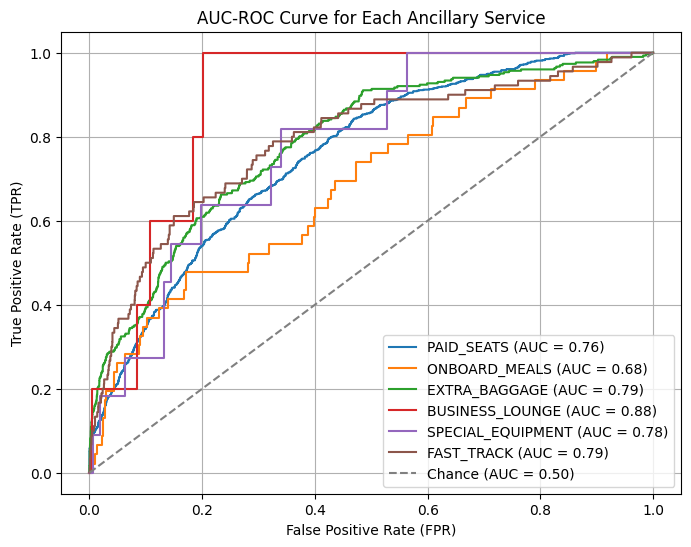

In [ ]:
# Plot AUC-ROC for each ancillary service
plt.figure(figsize=(8, 6))

for i, ancillary in enumerate(ancillaries):
    y_true = y_val_binary[:, i]
    y_prob = val_probas[:, i]
    
    # Compute the ROC curve and AUC
    fpr, tpr, thresholds = roc_curve(y_true, y_prob)
    auc_score = auc(fpr, tpr)
    
    # Plot ROC curve
    plt.plot(fpr, tpr, label=f'{ancillary} (AUC = {auc_score:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Chance (AUC = 0.50)')
# Customize the plot
plt.title('AUC-ROC Curve for Each Ancillary Service')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

PAID_SEATS 0.2039554716518039
ONBOARD_MEALS 0.01638888183336266
EXTRA_BAGGAGE 0.18930890746750562
BUSINESS_LOUNGE 5.515314590317829e-05
SPECIAL_EQUIPMENT 0.0006341172063813739
FAST_TRACK 0.030497335246826403


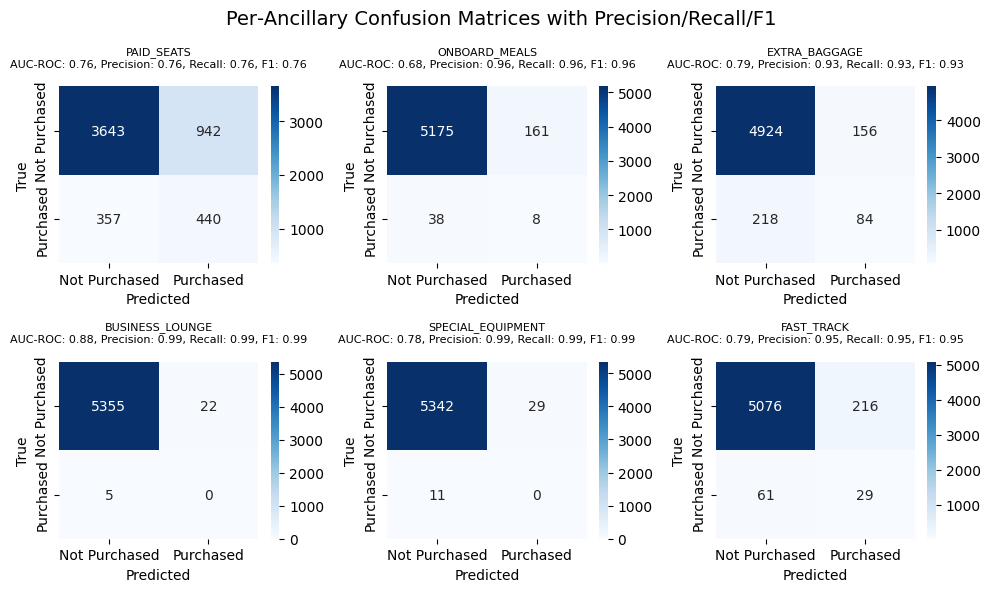

In [ ]:
# Create a subplot grid for confusion matrices
fig, axes = plt.subplots(2, 3, figsize=(10, 6))
axes = axes.flatten()

# Plot confusion matrix for each ancillary service
for i, ancillary in enumerate(ancillaries):
    ytrue = y_val_binary[:, i]
    yprob = val_probas[:, i]
    service_threshold = threshold_df.loc[
        threshold_df['ancillary'] == ancillary
    ].threshold.values[0]
    print(ancillary, service_threshold)
    val_predicted = (val_probas > service_threshold).astype(int)
    ypred = val_predicted[:, i]

    # Compute the ROC curve and AUC
    fpr, tpr, thresholds = roc_curve(ytrue, yprob)
    auc_score = auc(fpr, tpr)

    precision = precision_score(ytrue, ypred, average='micro')
    recall = recall_score(ytrue, ypred, average='micro')
    f1 = f1_score(ytrue, ypred, average='micro')
    title = (
        f"{ancillary}\n"
        f"AUC-ROC: {auc_score:.2f}, Precision: {precision:.2f}, Recall: {recall:.2f}, F1: {f1:.2f}\n"
    )

    cm = confusion_matrix(ytrue, ypred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Purchased', 'Purchased'], 
                yticklabels=['Not Purchased', 'Purchased'], ax=axes[i])
    axes[i].set_title(title, fontsize=8)
    axes[i].set_xlabel('Predicted')
    axes[i].set_ylabel('True')

# Adjust layout
fig.suptitle('Per‐Ancillary Confusion Matrices with Precision/Recall/F1', fontsize=14)
plt.tight_layout()
plt.show()

In [ ]:
def compute_metrics(data, model, ytrue, ancillaries):

    probas = np.column_stack([
        est.predict_proba(data)[:, 1]
        for est in model.estimators_
    ])

    rows = []
    for i, anc in enumerate(ancillaries):
        service_threshold = threshold_df.loc[
            threshold_df['ancillary'] == anc
        ].threshold.values[0]
        print(anc, service_threshold)
        predicted = (probas > service_threshold).astype(int)
        ypred = predicted[:, i]
        
        p   = precision_score(ytrue[:,i], predicted[:,i], average='micro')
        r   = recall_score(ytrue[:,i], predicted[:,i], average='micro')
        f1  = f1_score(ytrue[:,i], predicted[:,i], average='micro')
        auc = roc_auc_score(ytrue[:,i], probas[:,i])
        rows.append({
            'ancillary': anc,
            'precision': p,
            'recall':    r,
            'f1_score':  f1,
            'roc_auc':   auc
        })
    return pd.DataFrame(rows)

In [ ]:
df_train = compute_metrics(X_train, model, y_train_binary, ancillaries)
df_train['dataset'] = 'train'

df_val   = compute_metrics(X_val, model, y_val_binary, ancillaries)
df_val['dataset'] = 'val'

df_test  = compute_metrics(X_test,  model, y_test_binary, ancillaries)
df_test['dataset'] = 'test'

df_metrics = pd.concat([df_train, df_val, df_test], ignore_index=True)
df_metrics = df_metrics[['dataset','ancillary','precision','recall','f1_score','roc_auc']]

df_metrics

PAID_SEATS 0.2039554716518039
ONBOARD_MEALS 0.01638888183336266
EXTRA_BAGGAGE 0.18930890746750562
BUSINESS_LOUNGE 5.515314590317829e-05
SPECIAL_EQUIPMENT 0.0006341172063813739
FAST_TRACK 0.030497335246826403
PAID_SEATS 0.2039554716518039
ONBOARD_MEALS 0.01638888183336266
EXTRA_BAGGAGE 0.18930890746750562
BUSINESS_LOUNGE 5.515314590317829e-05
SPECIAL_EQUIPMENT 0.0006341172063813739
FAST_TRACK 0.030497335246826403
PAID_SEATS 0.2039554716518039
ONBOARD_MEALS 0.01638888183336266
EXTRA_BAGGAGE 0.18930890746750562
BUSINESS_LOUNGE 5.515314590317829e-05
SPECIAL_EQUIPMENT 0.0006341172063813739
FAST_TRACK 0.030497335246826403


,dataset,ancillary,precision,recall,f1_score,roc_auc
0,train,PAID_SEATS,0.836950,0.836950,0.836950,0.917398
1,train,ONBOARD_MEALS,0.979853,0.979853,0.979853,0.999988
2,train,EXTRA_BAGGAGE,0.969779,0.969779,0.969779,0.973881
3,train,BUSINESS_LOUNGE,0.999721,0.999721,0.999721,0.999999
4,train,SPECIAL_EQUIPMENT,0.997930,0.997930,0.997930,0.999999
5,train,FAST_TRACK,0.972765,0.972765,0.972765,0.999921
6,val,PAID_SEATS,0.758640,0.758640,0.758640,0.756667
7,val,ONBOARD_MEALS,0.963025,0.963025,0.963025,0.684693
8,val,EXTRA_BAGGAGE,0.930509,0.930509,0.930509,0.786945
9,val,BUSINESS_LOUNGE,0.994983,0.994983,0.994983,0.883615


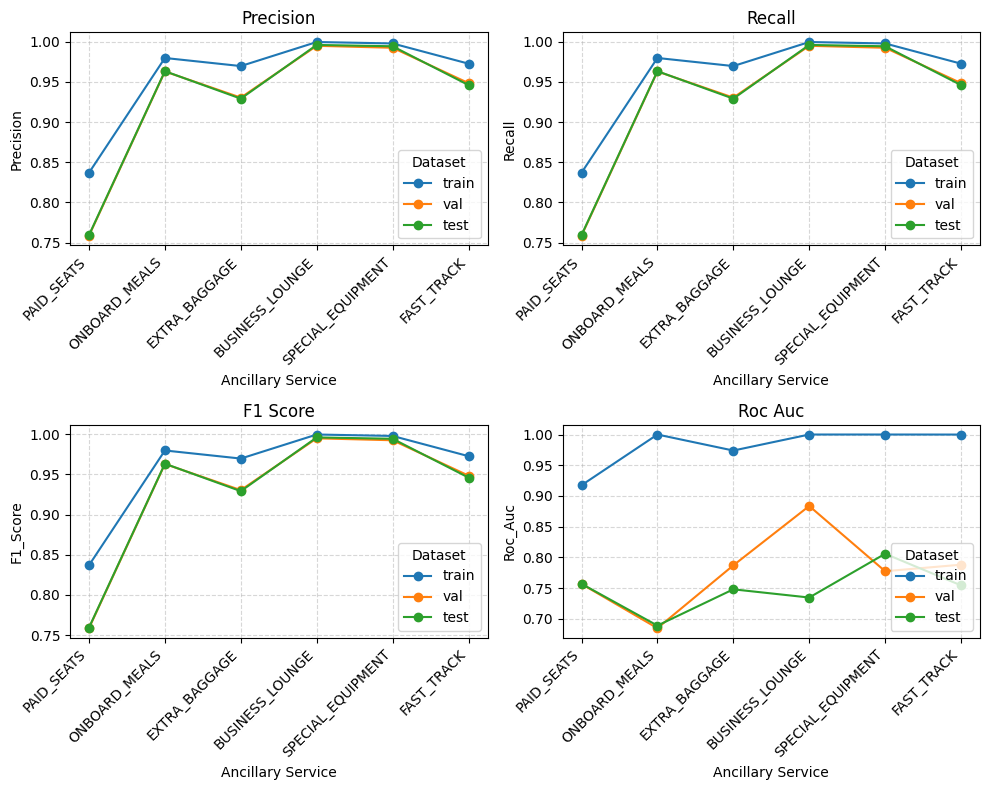

In [ ]:
datasets = ['train','val','test']
ancillaries = df_metrics['ancillary'].unique()
metrics = ['precision','recall','f1_score','roc_auc']

fig, axes = plt.subplots(2, 2, figsize=(10, 8))
axes = axes.flatten()

for ax, metric in zip(axes, metrics):
    for ds in datasets:
        sub = df_metrics[df_metrics['dataset']==ds]
        # ensure ancillaries in same order
        values = [ sub.loc[sub['ancillary']==a, metric].values[0] for a in ancillaries ]
        ax.plot(ancillaries, values, marker='o', label=ds)
    ax.set_title(metric.replace('_',' ').title())
    ax.set_xlabel('Ancillary Service')
    ax.set_ylabel(metric.title())
    ax.set_xticks(range(len(ancillaries)))
    ax.set_xticklabels(ancillaries, rotation=45, ha='right')
    ax.legend(title='Dataset', loc='lower right')
    ax.grid(linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

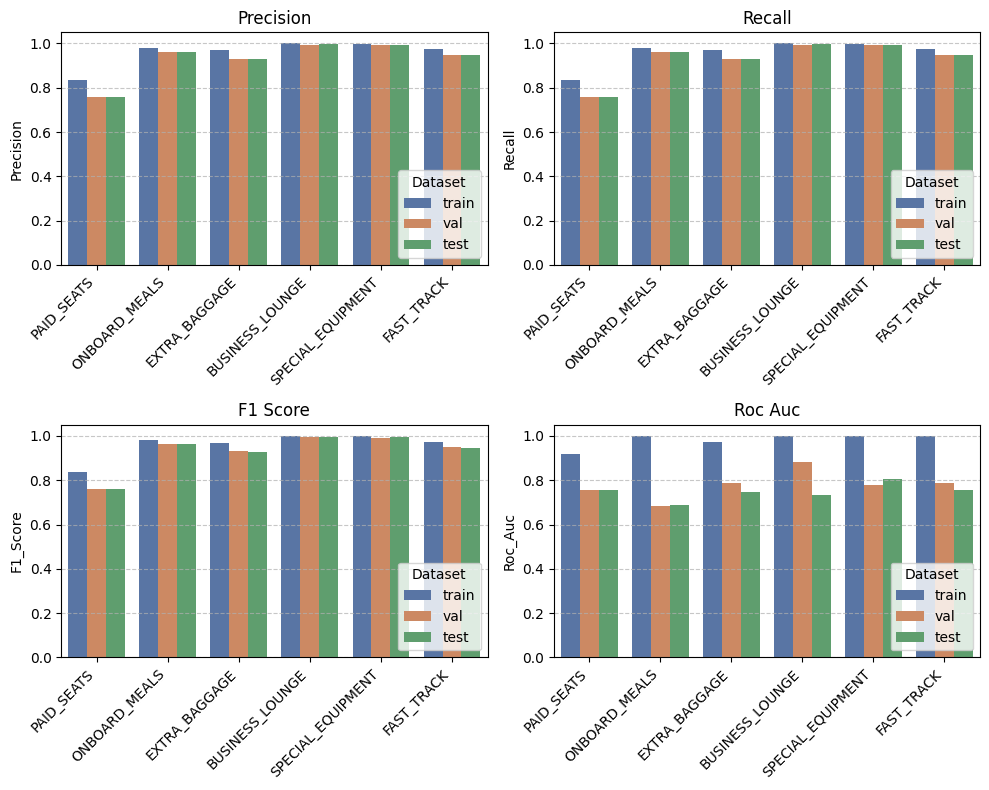

In [ ]:
metrics = ['precision','recall','f1_score','roc_auc']
fig, axes = plt.subplots(2, 2, figsize=(10, 8))
axes = axes.flatten()

for ax, metric in zip(axes, metrics):
    sns.barplot(
        data=df_metrics,
        x='ancillary',
        y=metric,
        hue='dataset',
        ax=ax,
        palette='deep'
    )
    ax.set_title(metric.replace('_',' ').title())
    ax.set_xlabel('')
    ax.set_ylabel(metric.title())
    ax.grid(axis='y', linestyle='--', alpha=0.7)
    ax.set_ylim(0, 1.05)
    for tick in ax.get_xticklabels():
        tick.set_rotation(45)
        tick.set_ha('right')
    ax.legend(title='Dataset', loc='lower right')

plt.tight_layout()
plt.show()